In [4]:
import sys

import tensorflow as tf # not set up for gpu yet (I don't think)
import numpy as np
import pandas as pd

import sklearn_tools as sktools

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

import selection_criteria as selcri

import awkward as ak

from tensorflow import keras

import hepfile

import importlib

import matplotlib.pylab as plt

2022-09-02 16:17:40.675578: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-02 16:17:40.675593: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
#infilename1 = '../ML_VARS_MATCHED_SORTED_NAOD-00000_190.h5'
#infilename2 = '../ML_VARS_TTbarPowheg_Semilept_2017_SMALL_10k.h5'


infilename1 = '../PROCESSED_SingleElectron_2018_MATCHED_SORTED_NAOD-00000_190.h5'
infilename2 = '../PROCESSED_SingleElectron_2018_TTToSemiLeptonic_UL_2018_SMALL_100k.h5'

In [6]:
importlib.reload(sktools)
importlib.reload(selcri)

df1,df2 = sktools.read_in_files_and_return_dataframe([infilename1,infilename2])

df1 = sktools.format(df1, columns_to_drop=None, className='signal')
df2 = sktools.format(df1, columns_to_drop=None, className='background')

dRcut = 0.1 

mask = selcri.selection_dRcut(df1, dRcut=0.1)
df1 = df1[mask]

mask = selcri.selection_dRcut(df2, dRcut=0.1)
df1 = df2[mask]


Building the indices...

Built the indices!
Data is read in and input file is closed.
Building the indices...

Built the indices!
Data is read in and input file is closed.


Plotting the correlation matrices!
For class background
Plotted the correlation matrices!
Plotting the correlation matrices!
For class background
Plotted the correlation matrices!


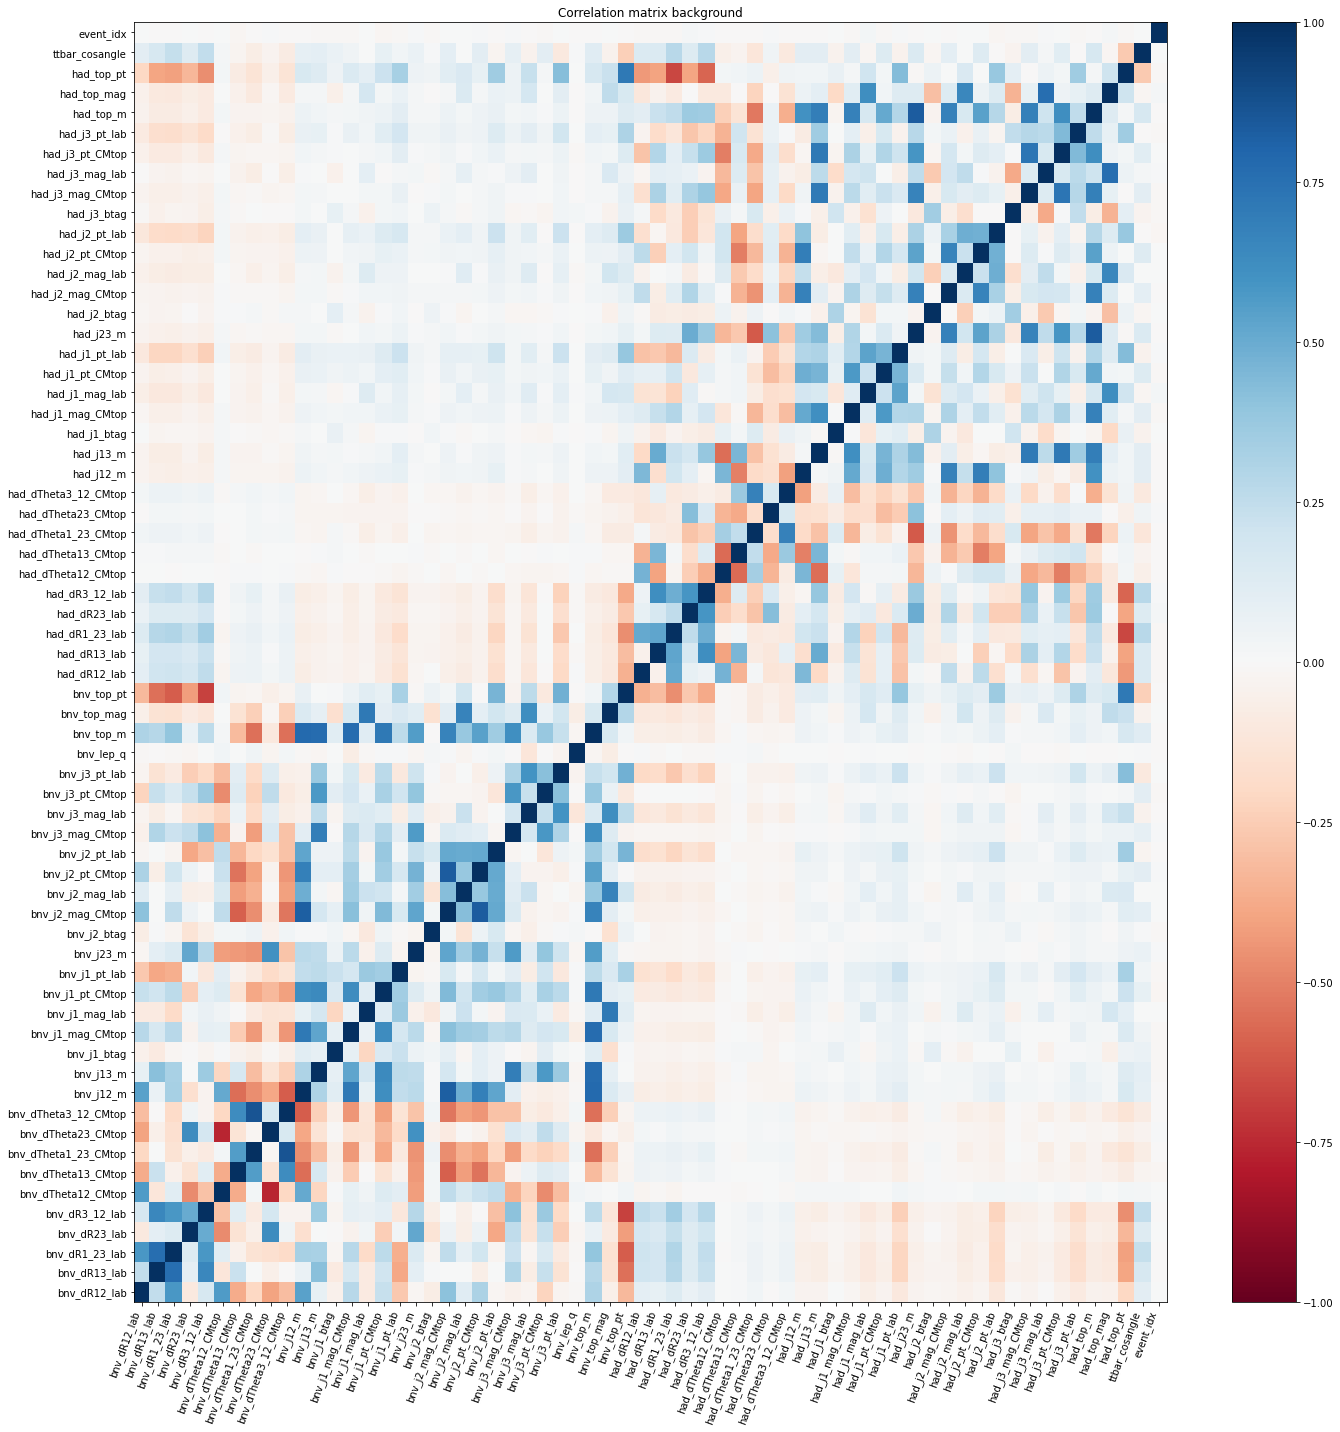

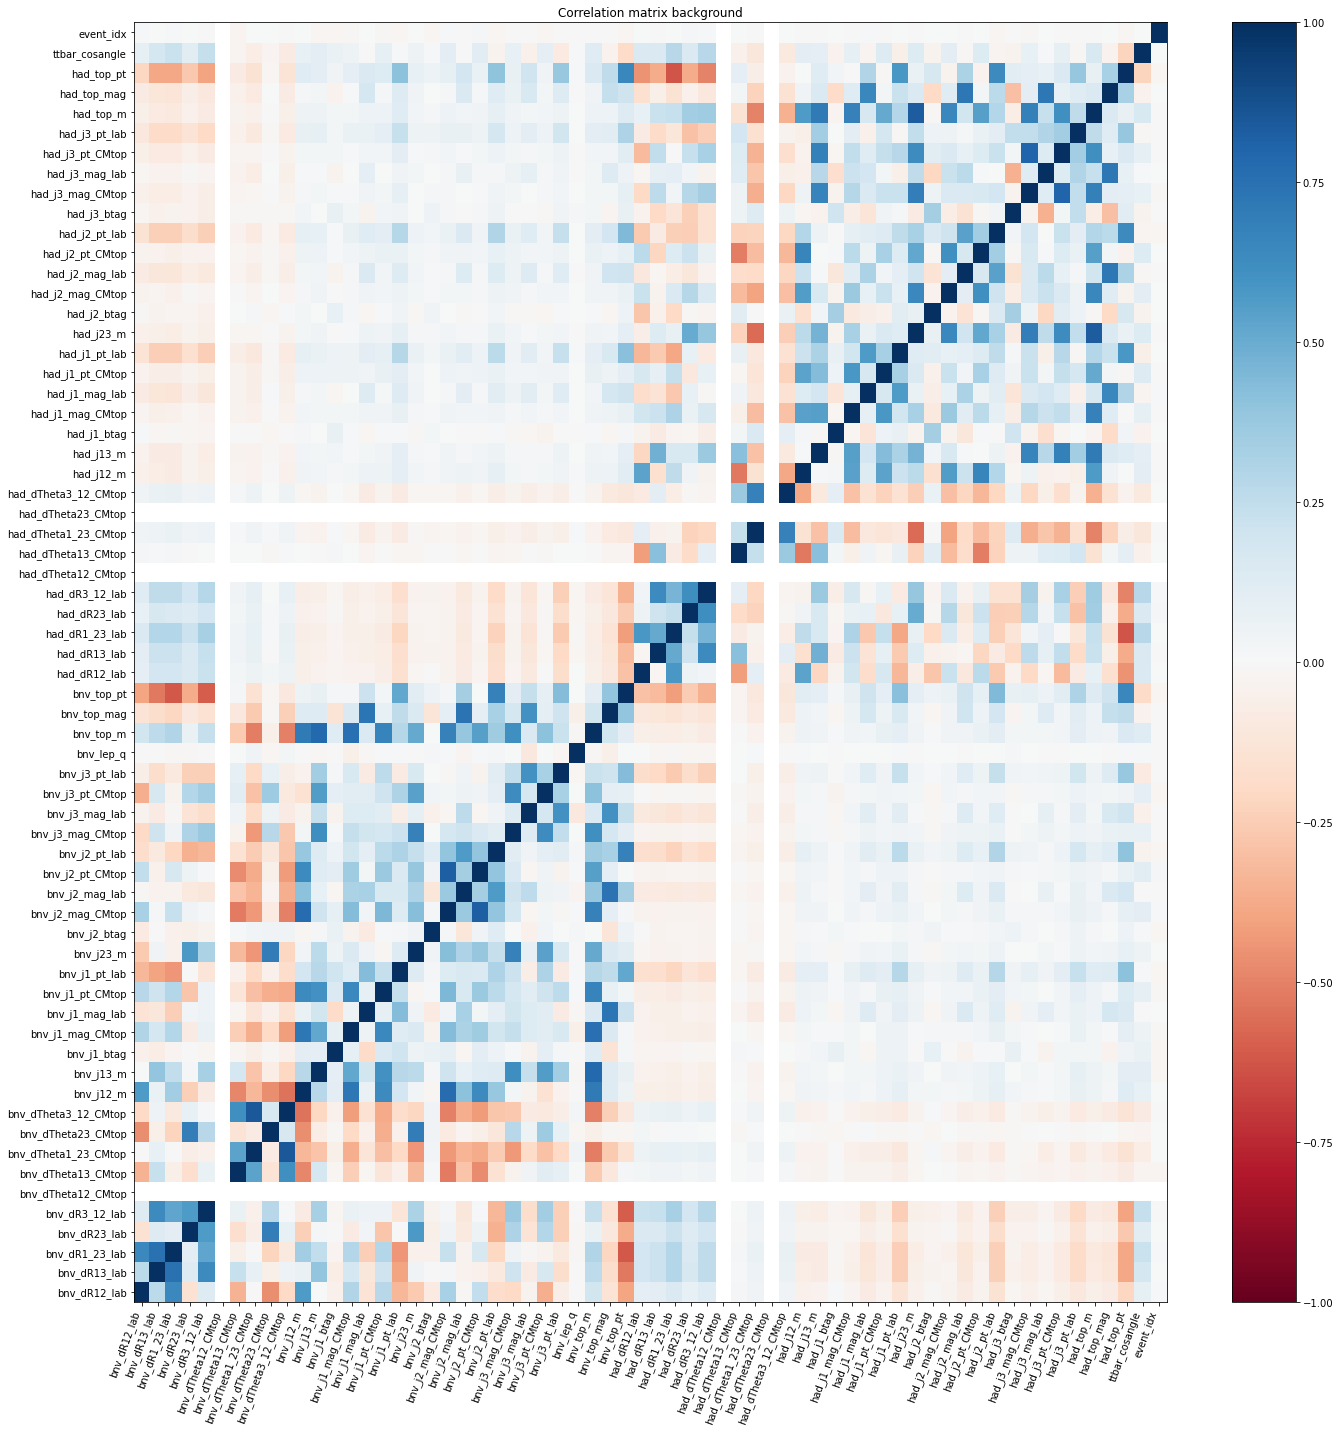

In [8]:
importlib.reload(sktools)

figs1,axes1 = sktools.plot_corr_matrix(df1,figsize=(20,20))
figs2,axes2 = sktools.plot_corr_matrix(df2,figsize=(20,20))

In [9]:
for a in df1.columns:
    if a[0:3] == 'bnv':
        print(a)

bnv_dR12_lab
bnv_dR13_lab
bnv_dR1_23_lab
bnv_dR23_lab
bnv_dR3_12_lab
bnv_dTheta12_CMtop
bnv_dTheta13_CMtop
bnv_dTheta1_23_CMtop
bnv_dTheta23_CMtop
bnv_dTheta3_12_CMtop
bnv_j12_m
bnv_j13_m
bnv_j1_btag
bnv_j1_mag_CMtop
bnv_j1_mag_lab
bnv_j1_pt_CMtop
bnv_j1_pt_lab
bnv_j23_m
bnv_j2_btag
bnv_j2_mag_CMtop
bnv_j2_mag_lab
bnv_j2_pt_CMtop
bnv_j2_pt_lab
bnv_j3_mag_CMtop
bnv_j3_mag_lab
bnv_j3_pt_CMtop
bnv_j3_pt_lab
bnv_lep_q
bnv_top_m
bnv_top_mag
bnv_top_pt


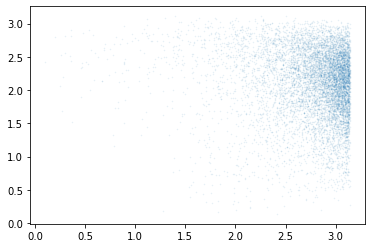

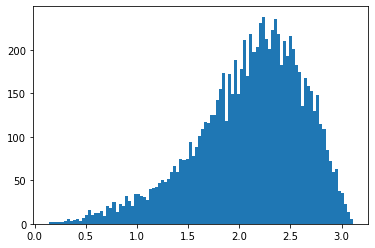

In [10]:
x = df1['had_dTheta3_12_CMtop'].values
y = df1['had_dTheta12_CMtop'].values

plt.plot(x,y,'.',markersize=1,alpha=0.1)

plt.figure()
plt.hist(y,bins=100);

9015
0.13675623


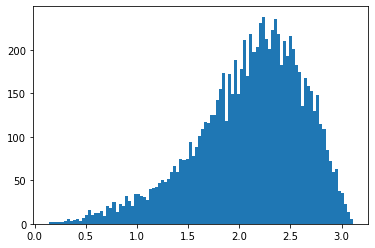

In [11]:
x = df1['had_dTheta12_CMtop'].values
#x = df1['had_dTheta3_12_CMtop'].values

print(len(x))
print(min(x))

plt.hist(x,bins=100);


In [12]:
dRcut = 0.0 

mask = (df1['had_dTheta12_CMtop'] > dRcut) & \
       (df1['had_dTheta23_CMtop'] > dRcut) & \
       (df1['had_dTheta13_CMtop'] > dRcut) & \
       (df1['had_dTheta1_23_CMtop'] > dRcut) & \
       (df1['had_dTheta3_12_CMtop'] > dRcut) & \
       (df1['bnv_dTheta12_CMtop'] > dRcut) & \
       (df1['bnv_dTheta23_CMtop'] > dRcut) & \
       (df1['bnv_dTheta13_CMtop'] > dRcut) & \
       (df1['bnv_dTheta1_23_CMtop'] > dRcut) & \
       (df1['bnv_dTheta3_12_CMtop'] > dRcut)

dftmp = df1[mask]
#? df1.drop

# Playing with model after training

In [13]:
#modelfilename = 'models/KERAS_TRAINING_ML_VARS_MATCHED_SORTED_NAOD-00000_190_ML_VARS_TTbarPowheg_Hadronic_2017_SMALL_10k.h5'
#modelfilename = 'models/KERAS_TRAINING_PROCESSED_SingleElectron_2018_MATCHED_SORTED_NAOD-00000_190_PROCESSED_SingleElectron_2018_TTToSemiLeptonic_UL_2018_SMALL_100k.h5'
modelfilename = 'models/KERAS_TRAINING_ML_VARS_MATCHED_SORTED_NAOD-00000_190_ML_VARS_TTbarPowheg_Semilept_2017_SMALL_10k.h5'

model = keras.models.load_model(modelfilename)

OSError: No file or directory found at models/KERAS_TRAINING_ML_VARS_MATCHED_SORTED_NAOD-00000_190_ML_VARS_TTbarPowheg_Semilept_2017_SMALL_10k.h5

In [14]:
#model.feature_importances_

In [ ]:
model

In [ ]:
model.count_params()

In [ ]:
importlib.reload(sktools)

#infilename = '../ML_VARS_TTbarPowheg_Semilept_2017_SMALL_10k.h5'
#infilename = '../ML_VARS_MATCHED_SORTED_NAOD-00000_190.h5'
infilename = '../PROCESSED_SingleElectron_2018_TTToSemiLeptonic_UL_2018_SMALL_100k.h5'

infilenames = [infilename,infilename]

df,df = sktools.read_in_files_and_return_dataframe(infilenames)

dRcut = 0.1 

mask = selcri.selection_dRcut(df, dRcut=0.1)
df = df[mask]

# Get rid of nans
dropped_na_idx = df.isna()
df.dropna(0,inplace=True)

# Will need these later
event_idx = df['event_idx']
event_counts = df['event_idx'].value_counts(sort=False).values

print("Size of files!")
print(len(df),infilenames[0])

toberemoved = []
toberemoved.append('bnv_dR12_lab')
toberemoved.append('bnv_dR13_lab')
toberemoved.append('bnv_dR1_23_lab')
toberemoved.append('bnv_dR23_lab')
toberemoved.append('bnv_dR3_12_lab')
toberemoved.append('bnv_dTheta12_CMtop')
toberemoved.append('bnv_dTheta13_CMtop')
toberemoved.append('bnv_dTheta1_23_CMtop')
toberemoved.append('bnv_dTheta23_CMtop')
toberemoved.append('bnv_dTheta3_12_CMtop')
toberemoved.append('bnv_j12_m')
toberemoved.append('bnv_j13_m')
toberemoved.append('bnv_j1_btag')
toberemoved.append('bnv_j1_mag_CMtop')
toberemoved.append('bnv_j1_mag_lab')
toberemoved.append('bnv_j1_pt_CMtop')
toberemoved.append('bnv_j1_pt_lab')
toberemoved.append('bnv_j23_m')
toberemoved.append('bnv_j2_btag')
toberemoved.append('bnv_j2_mag_CMtop')
toberemoved.append('bnv_j2_mag_lab')
toberemoved.append('bnv_j2_pt_CMtop')
toberemoved.append('bnv_j2_pt_lab')
toberemoved.append('bnv_j3_mag_CMtop')
toberemoved.append('bnv_j3_mag_lab')
toberemoved.append('bnv_j3_pt_CMtop')
toberemoved.append('bnv_j3_pt_lab')
toberemoved.append('bnv_lep_q')

toberemoved.append('event_idx')

#toberemoved.append('bnv_top_m')
#toberemoved.append('bnv_top_mag')
#toberemoved.append('bnv_top_pt')

df = sktools.format(df, columns_to_drop=toberemoved, className='signal')

# split into input and output columns
y = df.pop('Class') # all class values become 'y'
X = df

print("Lenth of X and y!")
print(len(X))
print(len(y))

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#.shape returns the dimensions of the dataset. So (48778, 18) means 48778 rows and 18 columns
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 


In [ ]:
#df['event_idx'].value_counts(sort=False).values

In [ ]:
dropped_na_idx

In [ ]:
df.keys()

In [ ]:
model.summary()

In [ ]:
X

In [ ]:
print(len(X))

In [ ]:
predictions = model.predict(X)

In [ ]:
print(len(predictions))
print(len(event_idx))

In [ ]:
print(len(predictions.transpose()[0]))
print(len(event_counts))

print(np.sum(event_counts))

print(event_counts[0:10])

In [ ]:
type(predictions.transpose()[0])

In [ ]:
a = ak.unflatten(np.array([1,2,3,4,5]), np.array([3,2]))
a

In [ ]:
ak_pred = ak.unflatten(predictions.transpose()[0],event_counts)

ak_pred

In [ ]:
len(event_counts)

In [ ]:
max_idx = ak.argmax(ak_pred, axis=1)
print(len(max_idx))
max_idx

In [ ]:
max(ak_pred[0])

In [ ]:
#print(ak_pred[1][2])

In [ ]:
#ak_pred[(np.array([0,1]),np.array([1,2]))]

In [ ]:
len(max_idx.to_numpy())

In [ ]:
array_idx = np.arange(0,len(max_idx),dtype=int)
print(array_idx)
print(len(array_idx), len(max_idx))

print(type(array_idx))
#print(type(max_idx.array()))


max_pred = ak_pred[(array_idx,max_idx.to_numpy())]
max_pred


In [ ]:
print(ak_pred[0])
print(max_pred[0])
#print(len(max_pred[0]))
print(ak_pred[1243])

In [ ]:
print(len(predictions))
print(len(max_pred))

In [ ]:
plt.hist(predictions[predictions>0.01],bins=100,density=True,alpha=0.5);
plt.hist(max_pred[max_pred>0.01],bins=100,density=True,alpha=0.5);

plt.ylim(0,5)


In [ ]:
plt.hist(predictions[predictions>0.01],bins=100,density=True,alpha=0.5);
plt.hist(max_pred[max_pred>0.01],bins=100,density=True,alpha=0.5);

plt.ylim(0,5)


In [ ]:
plt.hist(predictions[predictions>0.01],bins=100);
plt.ylim(0,1000)


In [ ]:
# Use this sorting to get the index of the minimun value

x = ak.Array([[7.7, 5.5, 7.7], [], [2.2], [8.8, 2.2]])

ak.argmin(x, axis=1)

In [ ]:
#infilename = '../ML_VARS_TTbarPowheg_Semilept_2017_SMALL_10k.h5'
infilename = '../PROCESSED_SingleElectron_2018_TTToSemiLeptonic_UL_2018_SMALL_100k.h5'
infilename2 = '../ML_VARS_MATCHED_SORTED_NAOD-00000_190.h5'

data_bkg,event_bkg = hepfile.load(infilename)
arrays_bkg = hepfile.unpack_awkward_arrays(data_bkg,groups=['ml'])

data_sig,event_bkg = hepfile.load(infilename2)
arrays_sig = hepfile.unpack_awkward_arrays(data_sig,groups=['ml'])

In [ ]:
print(len(data_bkg['metpt']))
print(len(data_sig['metpt']))

In [ ]:
plt.hist(data_sig['metpt'],bins=100,density=True,alpha=0.5,range=(0,200));
plt.hist(data_bkg['metpt'],bins=100,density=True,alpha=0.5,range=(0,200));


In [ ]:
print(event_counts[0])

print(data_bkg['


In [ ]:
x = arrays['ml']['bnv_dR12_lab']

x

In [ ]:
len(ak.flatten(x))

In [ ]:
len(data_in['ml/bnv_top_m'])

In [ ]:
len(predictions)

In [ ]:
dftmp = pd.DataFrame()

dftmp['a'] = np.array([0,0,0,1,1,1,1,1,2])

In [ ]:
dftmp.value_counts().values

In [ ]:
data_in['ml/nml']

In [ ]:
idx = []
for i,a in enumerate(data_in['ml/nml']):
    idx += (i*np.ones(a,dtype=int)).tolist()
    
#print(idx)

In [ ]:
len(idx)

# Feature importance

In [ ]:

import shap

In [ ]:
importlib.reload(sktools)

df0,df1 = sktools.read_in_files_and_return_dataframe([infilename1,infilename2])

toberemoved = []

df0 = sktools.format(df0, toberemoved, 'signal')
df1 = sktools.format(df1, toberemoved, 'background')
#df = mergeDataframes([df0[0:100000], df1[0:100000]])
#df = mergeDataframes([df0[0:50000], df1[0:50000]])
#df = mergeDataframes([df0[100000:200000], df1[100000:200000]])
df = sktools.mergeDataframes([df0, df1])

print("Merged and dropped columns!")
print(df.columns)
print()
#exit()


y = df.pop('Class')
X = df

#X = df.to_numpy()

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001)

#background = X[np.random.choice(X.shape[0],100, replace=False)]

print(X_train.shape)
print(X_test.shape)


X_test = X_test.to_numpy()

#explainer = shap.DeepExplainer(model, background)
explainer = shap.DeepExplainer(model, X_test)

shap_values = explainer.shap_values(X_test)


# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

In [ ]:
#? shap.plots.waterfall

In [ ]:
shap.plots.waterfall(explainer)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")
